In [1]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
os.chdir('/Users/brendan/Data Projects/clean_data/mb_monthly')
df = pd.read_csv("mb_stablecoins_082019.csv.gz", compression="gzip", low_memory=False, index_col=None, header=0)


In [13]:
df['hour'] = pd.DatetimeIndex(df['block_timestamp']).hour
df['day'] = pd.DatetimeIndex(df['block_timestamp']).day
df['weekday'] = pd.DatetimeIndex(df['block_timestamp']).dayofweek
df['month'] = pd.DatetimeIndex(df['block_timestamp']).month
df['year'] = pd.DatetimeIndex(df['block_timestamp']).year

In [6]:
df.head()
df.groupby(['topic_0']).count()

,log_index,transaction_index,transaction_hash,block_number,block_hash,block_timestamp,miner,block_size,gas_used,gas_limit,...,data,topic_1,topic_2,action,hour,day,weekday,month,year,amount_usd
topic_0,,,,,,,,,,,,,,,,,,,,,


In [15]:
df_heat = df[['stablecoin','topic_0','amount_usd','hour','day','weekday','month','year']].copy()

In [16]:
df_heat.head()

,stablecoin,topic_0,amount_usd,hour,day,weekday,month,year
0,USDC,burn,4290378.43,12,11,2,5,2022
1,USDC,burn,236.17,8,11,2,5,2022
2,USDC,mint,5066.03,20,11,2,5,2022
3,USDC,burn,34829.15,23,11,2,5,2022
4,USDC,mint,12402399.16,20,11,2,5,2022


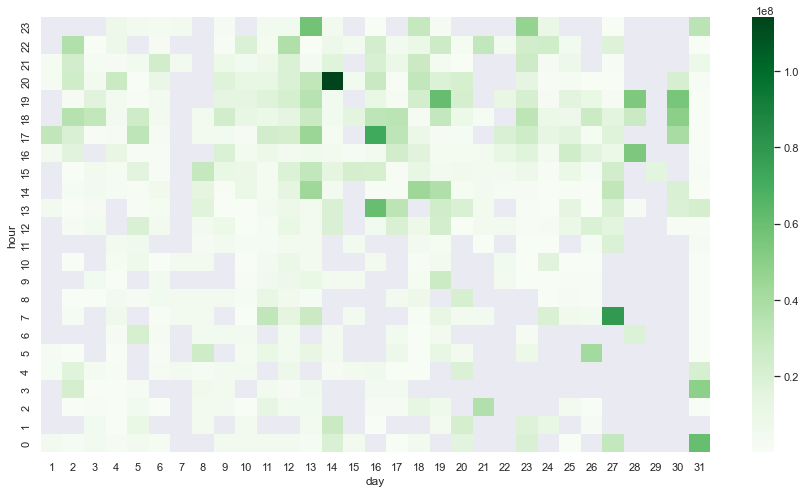

In [20]:
# generic heat map function 


df1 = df[df['topic_0'].isin(['mint'])]
df2 = df1[['hour', 'weekday','amount_usd']]
days = pd.DataFrame(df1['weekday'].unique())

heatmap_pt = pd.pivot_table(df2, values='amount_usd', 
index=['hour'], 
columns='weekday')

fig, ax = plt.subplots(figsize=(15,8))

sn.set()
ax = sn.heatmap(heatmap_pt, cmap="Greens")
ax.invert_yaxis()
plt.show()

